# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Imelda Margaret Kristiani
- **Email:** imeldamargareth77@gmail.com
- **ID Dicoding:** MC009D5X2127

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [4]:
import zipfile
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import tensorflowjs as tfjs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers

## Data Preparation

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Klasifikasi/Flowers.zip'
extract_path = '/content/Flowers'

# Ekstrak ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['flowers']

### Data Preprocessing

#### Split Dataset

In [ ]:
origin_dir = '/content/Flowers/flowers'
base_dir = '/content/Flowers_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

for class_name in os.listdir(origin_dir):
    class_path = os.path.join(origin_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        np.random.shuffle(images)

        train_split = int(0.64 * len(images))
        val_split = int(0.8 * len(images))

        # Copy images
        for img in images[:train_split]:
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

        for img in images[train_split:val_split]:
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

        for img in images[val_split:]:
            os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3744 images belonging to 5 classes.
Found 1254 images belonging to 5 classes.
Found 1554 images belonging to 5 classes.


## Modelling

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set Random Seed
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(42)

img_height = 224
img_width = 224

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

# Compile Model

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

callbacks = [early_stop, checkpoint, reduce_lr]


# Fit Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

# Load Best Model
best_model = keras.models.load_model('best_model.keras')

Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2794 - loss: 1.5567
Epoch 1: val_loss improved from inf to 1.21718, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.2799 - loss: 1.5560 - val_accuracy: 0.4777 - val_loss: 1.2172 - learning_rate: 0.0010
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4351 - loss: 1.2967
Epoch 2: val_loss improved from 1.21718 to 1.08587, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.4352 - loss: 1.2964 - val_accuracy: 0.5367 - val_loss: 1.0859 - learning_rate: 0.0010
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5059 - loss: 1.1745
Epoch 3: val_loss improved from 1.08587 to 1.00692, saving model to best_model.keras
117/117 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5060 - loss: 1.1743 - val_accuracy: 0.5949 - val_loss: 1.0069 - learning_rate: 0.0010
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.558

## Evaluasi dan Visualisasi

In [ ]:
train_loss, train_acc = best_model.evaluate(train_generator, verbose=0)
test_loss, test_acc = best_model.evaluate(test_generator, verbose=0)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Train Accuracy: 97.65%
Test Accuracy: 89.83%


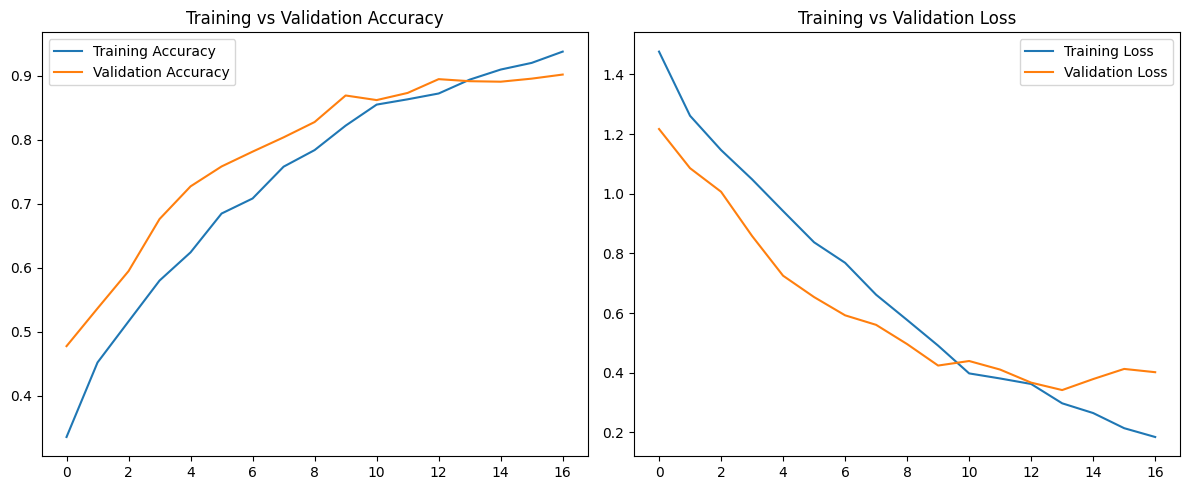

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Akurasi di subplot pertama
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training vs Validation Accuracy')
axs[0].legend()

# Plot Loss di subplot kedua
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training vs Validation Loss')
axs[1].legend()

# Menampilkan semua plot
plt.tight_layout()
plt.show()

## Konversi Model

In [ ]:
# Direktori menyimpan model
saved_model_dir = '/content/saved_model_flowers'
os.makedirs(saved_model_dir, exist_ok=True)

# Export SavedModel
model.export(saved_model_dir)

# Save ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('/content/flowers_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Save ke TFJS
tfjs_target_dir = '/content/tfjs_model_flowers'
os.makedirs(tfjs_target_dir, exist_ok=True)
tfjs.converters.save_keras_model(model, tfjs_target_dir)

print("Model saved successfully in SavedModel, TFLite, and TFJS formats.")

Saved artifact at '/content/saved_model_flowers'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_60')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  138696400900304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400901072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400900496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400901840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400901264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400902608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400902032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400903376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400902800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138696400904144: TensorSpec(shape=(), dtype=tf.resource, name=None)
 

failed to lookup keras version from the file,
    this is likely a weight only file
Model saved successfully in SavedModel, TFLite, and TFJS formats.


## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


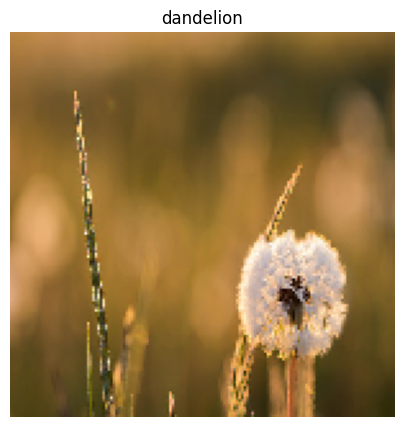

In [ ]:
sample_img, label = next(test_generator)
pred = model.predict(sample_img)

class_indices = test_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

predicted_classes = np.argmax(pred, axis=1)

chosen_idx = random.randint(0, len(predicted_classes) - 1)

# Tampilkan gambar
plt.figure(figsize=(5, 5))
plt.imshow(sample_img[chosen_idx])
plt.axis('off')
pred_label = idx_to_class[predicted_classes[chosen_idx]]
plt.title(pred_label, fontsize=12)
plt.show()